In [13]:
import pandas as pd
from plotly import express as px
import plotly.graph_objects as go

import json
from skimage import io

In [14]:
data = json.load(open('body-parts-pg3.json'))

In [15]:
df = pd.DataFrame.from_dict(data, orient='index')

In [ ]:
sorted(data['results-pg3/1897-AudreyCraven-29766.0.txt-annotated.txt'], reverse=True)

[[102,
  'hand.n.01',
  'external_body_part.n.01',
  'body_part.n.01',
  'part.n.03',
  'thing.n.12',
  'physical_entity.n.01'],
 [45,
  'eye.n.01',
  'organ.n.01',
  'body_part.n.01',
  'part.n.03',
  'thing.n.12',
  'physical_entity.n.01'],
 [44,
  'face.n.01',
  'external_body_part.n.01',
  'body_part.n.01',
  'part.n.03',
  'thing.n.12',
  'physical_entity.n.01'],
 [37,
  'head.n.01',
  'external_body_part.n.01',
  'body_part.n.01',
  'part.n.03',
  'thing.n.12',
  'physical_entity.n.01'],
 [18,
  'finger.n.01',
  'external_body_part.n.01',
  'body_part.n.01',
  'part.n.03',
  'thing.n.12',
  'physical_entity.n.01'],
 [16,
  'lip.n.01',
  'organ.n.01',
  'body_part.n.01',
  'part.n.03',
  'thing.n.12',
  'physical_entity.n.01'],
 [14,
  'back.n.01',
  'back.n.01',
  'body_part.n.01',
  'part.n.03',
  'thing.n.12',
  'physical_entity.n.01'],
 [12,
  'shoulder.n.01',
  'shoulder.n.01',
  'body_part.n.01',
  'part.n.03',
  'thing.n.12',
  'physical_entity.n.01'],
 [10,
  'arm.n.01',
 

In [27]:
dataClean = {fn.strip("results-pg3/").strip(".txt-annotated.txt"): 
             {l[1]: l[0] for l in d} for fn, d in data.items()}

In [32]:
df = pd.DataFrame(dataClean).fillna(0).T
df.sum().sort_values()

limbus.n.01            1.0
ureter.n.01            1.0
upper_jaw.n.01         1.0
fistula.n.02           1.0
nucleolus.n.01         1.0
                    ...   
arm.n.01           29137.0
head.n.01          41131.0
face.n.01          51991.0
eye.n.01           86701.0
hand.n.01         156058.0
Length: 497, dtype: float64

In [34]:
with open("wordCounts4.json") as f:
    wordCounts = json.load(f)

In [36]:
wordCounts = {fn.strip('.txt'): count for fn, count in wordCounts.items()}

In [40]:
len(wordCounts)

1607

In [41]:
len(df)

1599

Remove those items which we don't have data for. 

In [45]:
for fn in (wordCounts.keys() - df.index):
    del wordCounts[fn]

In [51]:
proportions = df.div(wordCounts, axis=0)

In [120]:
top20 = proportions.sum().sort_values(ascending=False).head(30)

In [121]:
other = proportions.sum().sort_values(ascending=False).tail(len(proportions.sum())-30)

In [122]:
other.sum()

1.4108516910914075

In [123]:
top20Df = pd.DataFrame(top20)
top20Df.loc['other'] = other.sum()
top20Df['body part'] = top20Df.index

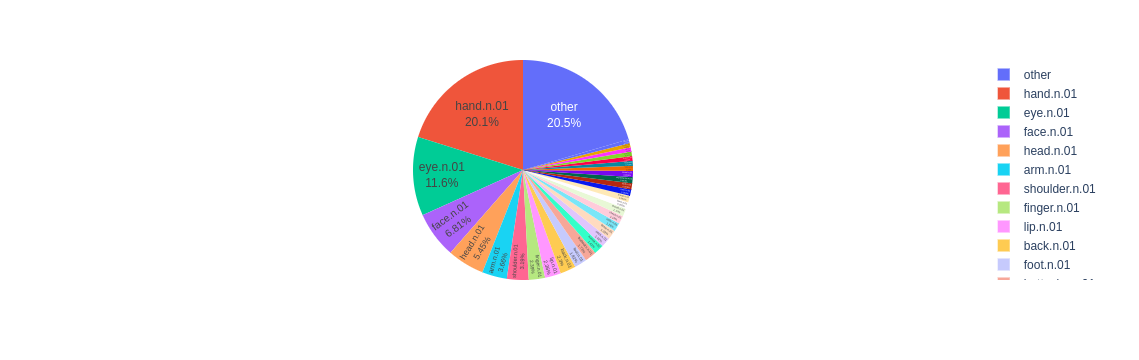

In [125]:
fig = px.pie(top20Df, values=0, names='body part')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.write_html('../includes/bodyPartSums.html')
fig.show()

In [126]:
top20

hand.n.01           1.386295
eye.n.01            0.797158
face.n.01           0.468804
head.n.01           0.374718
arm.n.01            0.251589
shoulder.n.01       0.219526
finger.n.01         0.164217
lip.n.01            0.162536
back.n.01           0.158255
foot.n.01           0.125586
buttocks.n.01       0.119277
auricle.n.02        0.097487
neck.n.01           0.097418
brow.n.01           0.095546
stifle.n.01         0.086683
cheek.n.01          0.081407
mouth.n.01          0.080387
bone.n.01           0.068256
breast.n.02         0.066680
torso.n.01          0.064254
tooth.n.01          0.062377
countenance.n.03    0.062177
throat.n.01         0.061663
chin.n.01           0.050941
heart.n.02          0.049249
feature.n.02        0.047842
knee.n.01           0.045895
ear.n.01            0.043331
mouth.n.02          0.041806
hair.n.03           0.039316
dtype: float64

In [205]:
bodyPoints = [("hand.n.01", 53, 562), ("eye.n.01", 200, 75), ("face.n.01", 220, 50),
              ("head.n.01", 220, 20), ("arm.n.01", 122,336), ("shoulder.n.01", 133, 209),
              ("finger.n.01", 50, 616), ("lip.n.01", 220, 120), ("back.n.01", 220, 256), 
              ("foot.n.01", 156, 956), ("buttocks.n.01", 181, 556), ("auricle.n.02", 170, 92),
              ("neck.n.01", 220,175), ("brow.n.01", 240, 50), ("stifle.n.01", 174, 766),
              ("cheek.n.01", 240, 100), ("mouth.n.01", 240, 110), ("breast.n.02", 180, 304),
              ("torso.n.01", 220, 320), ("tooth.n.01", 240, 105), ("throat.n.01", 220, 170),
              ("chin.n.01", 220, 120), ("heart.n.02", 280, 267), ("hair.n.03", 240, 18)]


In [206]:
def getSize(name):
    return top20[name] * 30

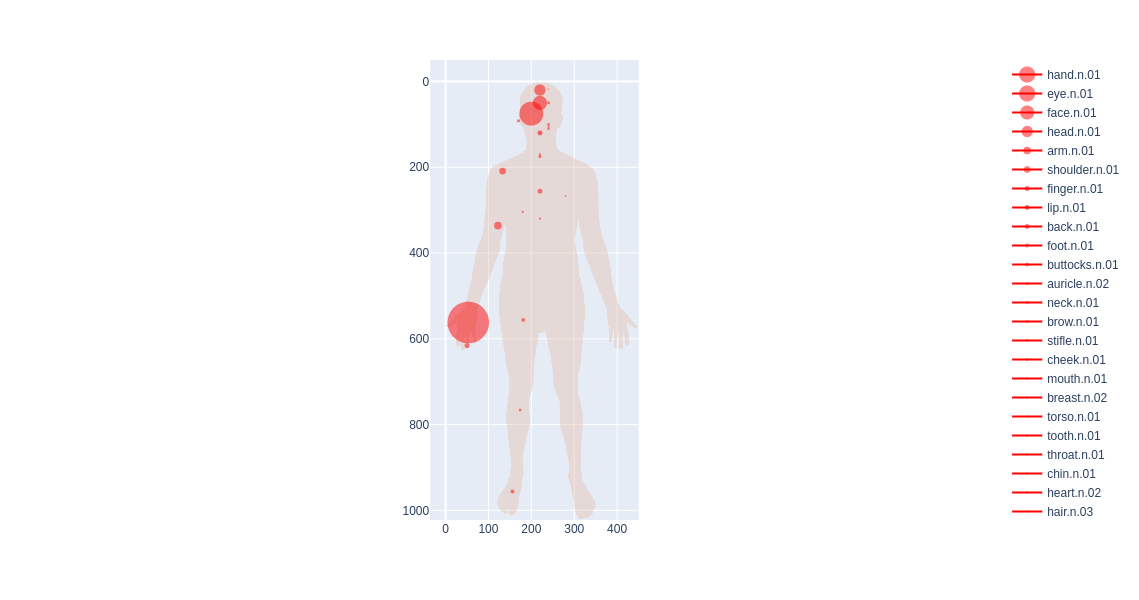

In [207]:
img = io.imread('Human_body_silhouette.svg.png')
fig = px.imshow(img, height=600)
for point in bodyPoints:
    name, x, y = point
    size = getSize(name)
    fig.add_trace(go.Scatter(name=name, x=[x], y=[y], marker=dict(color='red', size=size, opacity=0.5)))
fig.show()

In [208]:
fig.write_html("../includes/bodyPartSumsBody.html")